# Author : Nilakshi Nagrale
Task : Stock Performance Prediction using Numerical and Textual Analysis 
GRIP @ The Sparks Foundation

In [1]:
#importing required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from keras.layers import *
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Import Numerical Dataset for Exploratory Analysis

In [3]:
#Creating dataframe for exploratory analysis

df_stocks = pd.read_csv('CSV/TSLA.csv')
df_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-20,43.900002,44.750000,43.646000,43.939999,43.939999,17777500
1,2016-06-21,44.136002,44.514000,43.762001,43.922001,43.922001,22645000
2,2016-06-22,39.894001,41.189999,39.150002,39.332001,39.332001,118712000
3,2016-06-23,39.138000,39.509998,38.425999,39.279999,39.279999,50653500
4,2016-06-24,38.009998,39.023998,37.945999,38.630001,38.630001,35132500


In [4]:
#Extracting date
df_stocks['Date'] = pd.to_datetime(df_stocks.Date, format = '%Y-%m-%d')
df_stocks.index = df_stocks['Date']
df_stocks.dropna(inplace = True)

In [5]:
df_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-06-20,2016-06-20,43.900002,44.750000,43.646000,43.939999,43.939999,17777500
2016-06-21,2016-06-21,44.136002,44.514000,43.762001,43.922001,43.922001,22645000
2016-06-22,2016-06-22,39.894001,41.189999,39.150002,39.332001,39.332001,118712000
2016-06-23,2016-06-23,39.138000,39.509998,38.425999,39.279999,39.279999,50653500
2016-06-24,2016-06-24,38.009998,39.023998,37.945999,38.630001,38.630001,35132500


Text(0.5, 1.0, 'Closing Price')

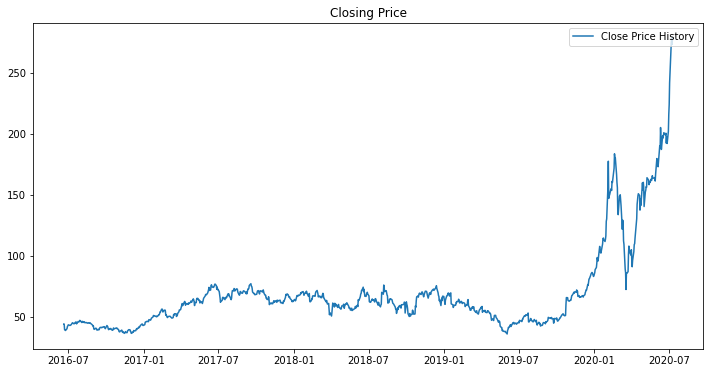

In [6]:
#plotting closing price 
plt.figure(figsize = (12,6))
plt.plot(df_stocks['Close'], label = 'Close Price History')
plt.legend(loc = 'upper right')
plt.title('Closing Price')

## Data Normalization & Division of Dataset into Training & Test sets

In [7]:
df_stocks_2 = pd.read_csv('CSV/TSLA.csv', usecols = [5], engine = 'python')
df_stocks_2.dropna(inplace = True)
df_stocks_2 = df_stocks_2.values
df_stocks_2 = df_stocks_2.astype('float32')

In [8]:
type(df_stocks_2)

numpy.ndarray

In [9]:
# fix random seed for reproducibility
np.random.seed(7)

In [10]:
#normalize the dataset
scaler = MinMaxScaler(feature_range = (0, 1))
df_stocks_2 = scaler.fit_transform(df_stocks_2)

In [11]:
#split dataset into train & test sets
train_size = int(len(df_stocks_2) * 0.67)
test_size = len(df_stocks_2) - train_size
train, test = df_stocks_2[0:train_size,:], df_stocks_2[train_size:len(df_stocks_2),:]
print(len(train), len(test))

684 337


In [12]:
#convert array into a dataset matrix
def create_dataset(df_stocks_2, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(df_stocks_2)-look_back-1):
        q = df_stocks_2[i:(i+look_back), 0]
        dataX.append(q)
        dataY.append(df_stocks_2[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
#reshape into X=t & Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [14]:
#reshape into [values, time-steps, dimensional outputs]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [15]:
type(trainX)

numpy.ndarray

## Create LSTM for Numerical Analysis

In [16]:
#build the LSTM
model = Sequential()
model.add(LSTM(7, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
680/680 - 2s - loss: 6.6273e-04
Epoch 2/100
680/680 - 1s - loss: 9.5364e-05
Epoch 3/100
680/680 - 1s - loss: 9.4305e-05
Epoch 4/100
680/680 - 1s - loss: 9.8175e-05
Epoch 5/100
680/680 - 1s - loss: 8.8315e-05
Epoch 6/100
680/680 - 1s - loss: 9.1248e-05
Epoch 7/100
680/680 - 1s - loss: 8.6773e-05
Epoch 8/100
680/680 - 1s - loss: 9.3592e-05
Epoch 9/100
680/680 - 1s - loss: 8.6506e-05
Epoch 10/100
680/680 - 1s - loss: 8.6946e-05
Epoch 11/100
680/680 - 1s - loss: 8.4064e-05
Epoch 12/100
680/680 - 1s - loss: 8.3839e-05
Epoch 13/100
680/680 - 1s - loss: 7.6336e-05
Epoch 14/100
680/680 - 1s - loss: 7.5704e-05
Epoch 15/100
680/680 - 1s - loss: 7.2653e-05
Epoch 16/100
680/680 - 1s - loss: 6.9704e-05
Epoch 17/100
680/680 - 1s - loss: 6.5256e-05
Epoch 18/100
680/680 - 1s - loss: 6.1433e-05
Epoch 19/100
680/680 - 1s - loss: 6.2620e-05
Epoch 20/100
680/680 - 1s - loss: 5.9468e-05
Epoch 21/100
680/680 - 1s - loss: 6.1620e-05
Epoch 22/100
680/680 - 1s - loss: 6.0435e-05
Epoch 23/100
680/68

## Make the Predictions

In [17]:
#making predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

In [18]:
#inverting predictions to report performance in same units as that of original data
train_predict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform([trainY])
test_predict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform([testY])

In [19]:
#calculate root mean squared error
train_score = math.sqrt(mean_squared_error(trainY[0], train_predict[:,0]))
print("RMS Error = ", train_score)
test_score = math.sqrt(mean_squared_error(testY[0], test_predict[:,0]))
print("RMS Error = ", test_score)

RMS Error =  1.7711148537666264
RMS Error =  14.32223401442737


## Plot the predictions

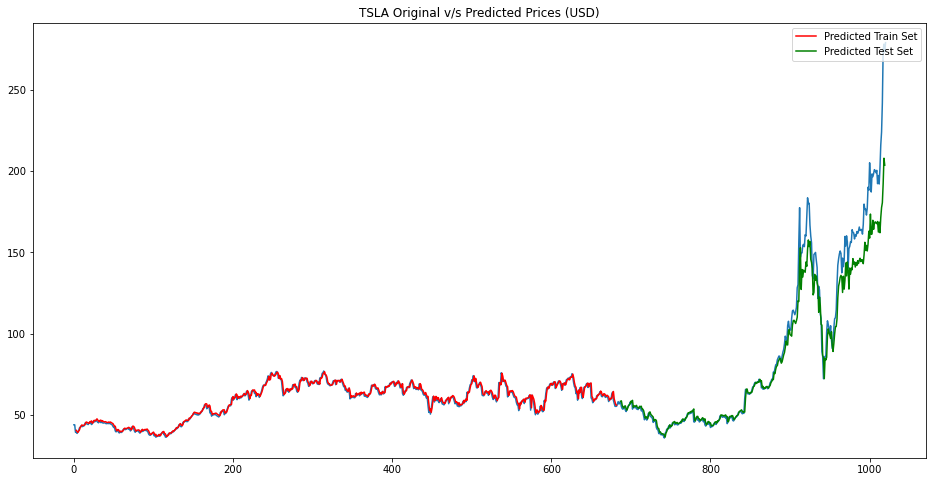

In [20]:
#shifting train predictions to align with original dataset
train_predict_plot = np.empty_like(df_stocks_2)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back : len(train_predict) + look_back, :] = train_predict

#shifting test predictions to align with original dataset
test_predict_plot = np.empty_like(df_stocks_2)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back*2) + 1 : len(df_stocks_2)-1, :] = test_predict

#Visualising the results
plt.figure(figsize = (16,8))
plt.plot(scaler.inverse_transform(df_stocks_2))
plt.plot(train_predict_plot, color = 'red', label = 'Predicted Train Set')
plt.plot(test_predict_plot, color = 'green', label = 'Predicted Test Set')
plt.legend(loc = 'upper right')
plt.title('TSLA Original v/s Predicted Prices (USD)')
plt.show()


## Import Textual Dataset for EDA

In [21]:
columns = ['Date', 'Category', 'Headline']
df_news = pd.read_csv('CSV/india-news-headlines.csv', names = columns)
df_news

,Date,Category,Headline
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3424063,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,20201231,removed,Govt extends deadline for use of FASTag till F...


In [22]:
df_news.drop(0, inplace = True)
df_news.drop('Category', axis = 1, inplace = True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Date      object
 1   Headline  object
dtypes: object(2)
memory usage: 78.4+ MB


In [23]:
df_news

,Date,Headline
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic
...,...,...
3424063,20201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,20201231,Govt extends deadline for use of FASTag till F...


In [24]:
df_news['Date'] = pd.to_datetime(df_news['Date'], infer_datetime_format=True) #format = '%Y %m %d')
df_news.head()

,Date,Headline
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa
5,2001-01-02,Extra buses to clear tourist traffic


In [25]:
#grouping headlines per day
df_news['Headline'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x))
df_news = df_news.drop_duplicates()
df_news.reset_index(inplace = True, drop = True)
df_news

,Date,Headline
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


## Subjectivity & Polarity

In [26]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [27]:
#calculating subjectivity & polarity for headlines
df_news['Subjectivity'] = df_news['Headline'].apply(getSubjectivity)
df_news['Polarity'] = df_news['Headline'].apply(getPolarity)
df_news

,Date,Headline,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,0.424021,0.061210
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496


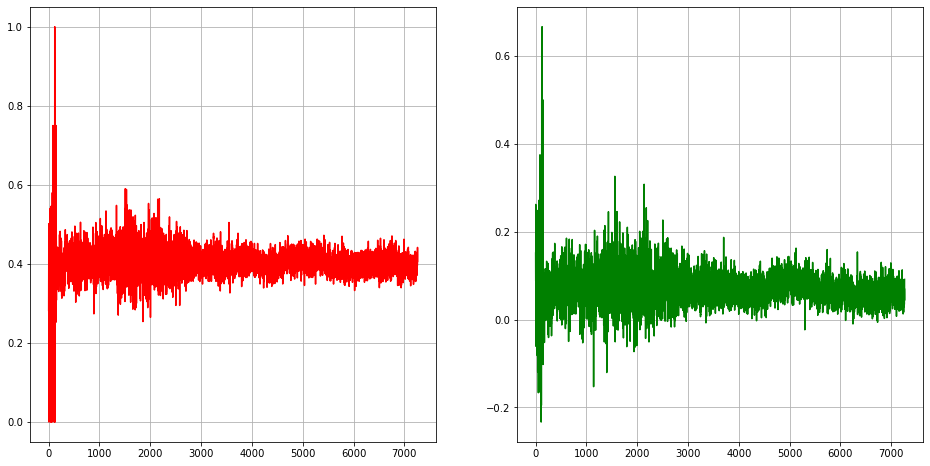

In [28]:
#visualizing subjectivity & polarity scores
plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
plt.plot(df_news['Subjectivity'], 'red')
plt.grid()
plt.subplot(1,2,2)
plt.plot(df_news['Polarity'], 'green')
plt.grid()

## Perform Sentiment Analysis on the Headlines.

In [30]:
sen = SentimentIntensityAnalyzer()

df_news['Compound'] = [sen.polarity_scores(x) ['compound'] for x in df_news['Headline']]
df_news['Negative'] = [sen.polarity_scores(x) ['neg'] for x in df_news['Headline']]
df_news['Neutral'] = [sen.polarity_scores(x) ['neu'] for x in df_news['Headline']]
df_news['Positive'] = [sen.polarity_scores(x) ['pos'] for x in df_news['Headline']]
df_news


,Date,Headline,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886,-0.9997,0.129,0.793,0.078
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517,-0.9998,0.138,0.768,0.093
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,0.424021,0.061210,-0.9999,0.150,0.754,0.096
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496,-0.9999,0.144,0.775,0.081


## Merge Numerical & Textual Data

In [31]:
merge = df_news
merge

,Date,Headline,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886,-0.9997,0.129,0.793,0.078
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517,-0.9998,0.138,0.768,0.093
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,0.424021,0.061210,-0.9999,0.150,0.754,0.096
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496,-0.9999,0.144,0.775,0.081


In [32]:
df_merged = merge[['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]
df_merged

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...
7257,0.395808,0.035886,-0.9997,0.129,0.793,0.078
7258,0.412945,0.070517,-0.9998,0.138,0.768,0.093
7259,0.424021,0.061210,-0.9999,0.150,0.754,0.096
7260,0.441660,0.043496,-0.9999,0.144,0.775,0.081


In [38]:
sc = MinMaxScaler()
df_2 = pd.DataFrame(sc.fit_transform(df_merged))
df_2.columns = df_merged.columns
df_2.index = df_merged.index
df_2

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.427407,0.00945,0.274775,0.807,0.116776
1,0.407692,0.357550,0.36800,0.274775,0.766,0.182566
2,0.446847,0.356994,0.93690,0.225225,0.797,0.169408
3,0.476612,0.550397,0.98845,0.279279,0.719,0.258224
4,0.439394,0.535354,0.28925,0.342342,0.704,0.235197
...,...,...,...,...,...,...
7257,0.395808,0.299132,0.00015,0.290541,0.793,0.128289
7258,0.412945,0.337611,0.00010,0.310811,0.768,0.152961
7259,0.424021,0.327271,0.00005,0.337838,0.754,0.157895
7260,0.441660,0.307589,0.00005,0.324324,0.775,0.133224


In [52]:
x = df_2[0:1021]
y = df_stocks['Close']

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape

(816, 6)

In [54]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
380,0.441806,0.332991,0.00020,0.407658,0.703,0.190789
204,0.387233,0.319779,0.00020,0.362613,0.732,0.174342
361,0.414975,0.314818,0.00045,0.380631,0.701,0.212171
5,0.365356,0.191805,0.00280,0.295045,0.848,0.034539
766,0.453988,0.276267,0.00030,0.391892,0.744,0.134868
693,0.378382,0.345764,0.00070,0.304054,0.780,0.139803
736,0.412313,0.347572,0.00090,0.299550,0.772,0.156250
231,0.394927,0.297192,0.00015,0.405405,0.747,0.121711
667,0.370214,0.339575,0.00070,0.324324,0.752,0.171053
150,0.458550,0.345636,0.00190,0.351351,0.727,0.192434


## Train Random Forest Regressor & AdaBoost Regressor for hybrid model

In [55]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)

In [56]:
#determing the accuracy of the model
print(rf_predict[:10])
print(y_test[:10])
print("RMS Error = ", math.sqrt(mean_squared_error(rf_predict, y_test)))


[60.34498002 42.46357945 41.84793796 88.16754063 67.9506996  54.95220032
 75.34724004 61.10291997 94.15796086 71.86099957]
Date
2020-06-22    198.863998
2016-07-28     46.122002
2016-10-07     39.321999
2017-07-28     67.014000
2017-09-25     68.998001
2016-06-21     43.922001
2017-05-18     62.612000
2018-11-26     69.199997
2020-02-18    171.679993
2019-05-13     45.402000
Name: Close, dtype: float64
RMS Error =  43.86189974447909


In [58]:
adboost = AdaBoostRegressor()
adboost.fit(x_train, y_train)
f_predict = adboost.predict(x_test)
print("RMS Error = ", math.sqrt(mean_squared_error(f_predict, y_test)))


RMS Error =  48.16292077840915


Out of the 2 models, RF Regressor gives the accurate output. But the unpredictable and dynamic nature of the stock market cannot be easily tamed. A hybrid model for Stock Performance prediction using Numerical & Textual analysis has successfully been created. 